In [182]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

### Importing the data and checking structure

In [183]:
df_original = pd.read_csv('youtube_news_transcripts.csv')
df_original.head()

,video_id,publish_date,title,source,description,text
0,I1NEYoq6lJ8,2024-01-18,Madonna sued for concert starting late,ABC News,ABC News legal contributor Channa Lloyd talks ...,well onto another lawsuit this one centered ar...
1,MnkdT5OXCuw,2024-01-18,Supreme Court hears arguments on case that cou...,ABC News,ABC News’ Devin Dwyer has the details on a Sup...,arguments on a major case that could impact ho...
2,eJ_w39C09Y0,2024-01-18,E. Jean Carroll wraps up testimony in civil de...,ABC News,ABC News’ Olivia Rubin is at the courthouse wh...,Ean Carol is wrapping up her testimony today a...
3,L_CQMT7Igwk,2024-01-18,"July 9, 2004: Scott Peterson's parents tell Ba...",ABC News,Scott Peterson was on trial for the murder of ...,when your child has been murdered it's a night...
4,dMvmZrn8e1M,2024-01-18,Innocence Project takes up case of notorious k...,ABC News,The LA Innocence Project has taken up the noto...,. STAY TUNED. WE'LL FOLLOW IT. RACHEL BATE ON ...


In [184]:
df_original.shape

(2672, 6)

In [185]:
df_original.dtypes

video_id        object
publish_date    object
title           object
source          object
description     object
text            object
dtype: object

In [186]:
df_original['source'].value_counts()

Fox News    1030
CNN          755
ABC News     694
BBC News     193
Name: source, dtype: int64

In [187]:
df_original['publish_date'].unique()

array(['2024-01-18', '2024-01-17', '2024-01-16', '2024-01-15',
       '2024-01-14', '2024-01-13', '2024-01-12', '2024-01-11',
       '2024-01-10', '2024-01-09', '2024-01-08', '2024-01-07',
       '2024-01-06', '2024-01-05', '2024-01-04', '2024-01-03',
       '2024-01-02', '2024-01-01', '2023-12-31', '2023-12-30',
       '2023-12-29', '2023-12-28', '2023-12-27', '2023-12-26',
       '2023-12-25', '2023-12-24', '2023-12-23', '2023-12-22',
       '2023-12-21', '2023-12-20', '2023-12-19', '2023-12-18'],
      dtype=object)

In [188]:
len(df_original['publish_date'].unique())

32

In [189]:
df_original.iloc[0]['text']

"well onto another lawsuit this one centered around pop icon Madonna she's facing the music Superstar is being sued for failing to get into the groove and start a recent concert more than two hours late two men actually bought tickets for her December 13th celebration tour at Barkley Center well fans cherished those tickets that the show would start at 8:30 p.m. but it was no Holiday Madonna didn't take the stage until border line 11:00 p.m. the men now expressing themselves saying there was limited right sharing available because the concert didn't end until after 1:00 a.m. and they lived to tell about it because they were forced to pay for private transportation and Like a Prayer the lawsuit is seeking unspecified damages I don't know how our legal contributor shaa Lloyd could not be laughing at this moment come on shaa that intro took a lot of work and a lot of research on the behalf of Andre who loves Madonna clearly thank you she's laughing story K all right I'm not going to make 

### Analyzing how often countries are mentioned by news outlets

In [191]:
import pycountry
countries = pycountry.countries
len(countries)

249

In [192]:
df = df_original.copy()
for country in countries:
    df[country.name] = df_original['text'].str.contains(country.name, case=False, regex=False)
    df = df.copy()

In [193]:
df_original.head()

,video_id,publish_date,title,source,description,text
0,I1NEYoq6lJ8,2024-01-18,Madonna sued for concert starting late,ABC News,ABC News legal contributor Channa Lloyd talks ...,well onto another lawsuit this one centered ar...
1,MnkdT5OXCuw,2024-01-18,Supreme Court hears arguments on case that cou...,ABC News,ABC News’ Devin Dwyer has the details on a Sup...,arguments on a major case that could impact ho...
2,eJ_w39C09Y0,2024-01-18,E. Jean Carroll wraps up testimony in civil de...,ABC News,ABC News’ Olivia Rubin is at the courthouse wh...,Ean Carol is wrapping up her testimony today a...
3,L_CQMT7Igwk,2024-01-18,"July 9, 2004: Scott Peterson's parents tell Ba...",ABC News,Scott Peterson was on trial for the murder of ...,when your child has been murdered it's a night...
4,dMvmZrn8e1M,2024-01-18,Innocence Project takes up case of notorious k...,ABC News,The LA Innocence Project has taken up the noto...,. STAY TUNED. WE'LL FOLLOW IT. RACHEL BATE ON ...


In [195]:
mentions_df = df.groupby('publish_date')[[country.name for country in countries]].sum().reset_index()
mentions_df.set_index('publish_date', inplace=True)
mentions_df.head()

,Aruba,Afghanistan,Angola,Anguilla,Åland Islands,Albania,Andorra,United Arab Emirates,Argentina,Armenia,...,"Virgin Islands, British","Virgin Islands, U.S.",Viet Nam,Vanuatu,Wallis and Futuna,Samoa,Yemen,South Africa,Zambia,Zimbabwe
publish_date,,,,,,,,,,,,,,,,,,,,,
2023-12-18,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,6,1,0,0
2023-12-19,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,10,0,0,0
2023-12-20,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,0
2023-12-21,0,3,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,3,0,0,0
2023-12-22,0,1,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,1,0,0,0


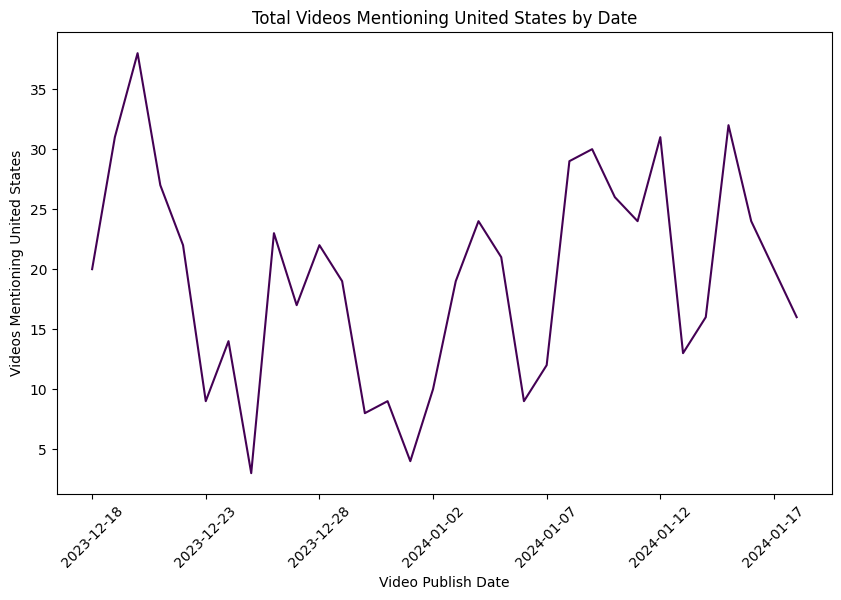

In [210]:
plt.figure(figsize=(12, 6))
mentions_df['United States'].plot(kind='line', figsize=(10, 6), colormap='viridis')
plt.xlabel('Video Publish Date')
plt.ylabel('Videos Mentioning United States')
plt.title('Total Videos Mentioning United States by Date')
plt.xticks(rotation=45)
plt.show()

In [197]:
total_mentions = mentions_df.sum()
total_mentions.sort_values(ascending=False, inplace=True)
total_mentions.head()

United States    622
Israel           550
Oman             327
Ukraine          267
Mexico           211
dtype: int64

In [198]:
top_5_countries = total_mentions.index.tolist()[:5]
top_5_countries

['United States', 'Israel', 'Oman', 'Ukraine', 'Mexico']

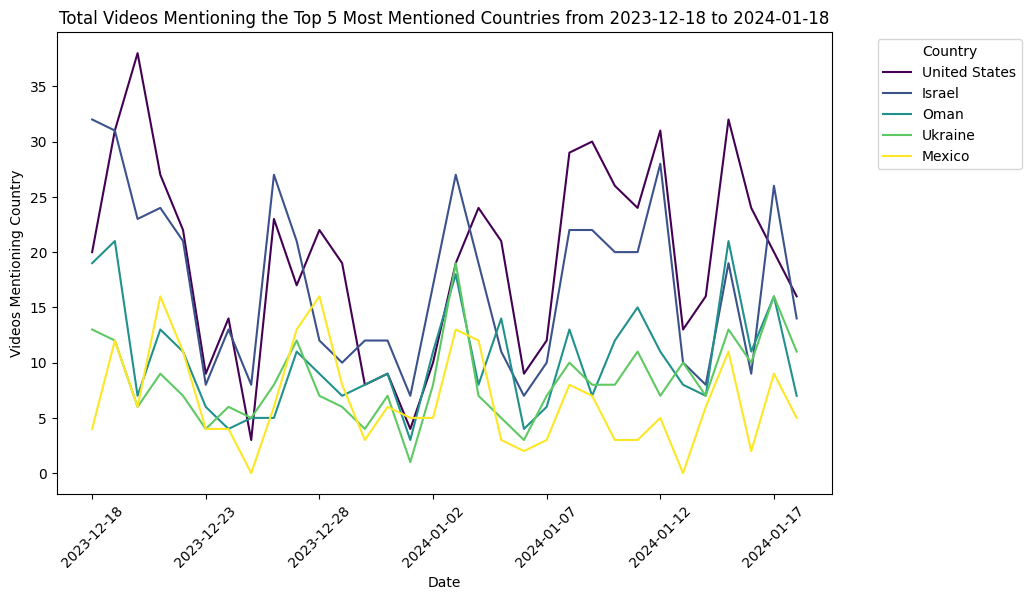

In [206]:
mentions_df[top_5_countries].plot(kind='line', figsize=(10, 6), colormap='viridis')

end_date = df_original['publish_date'].unique()[0]
start_date = df_original['publish_date'].unique()[-1]
plt.title(f'Total Videos Mentioning the Top 5 Most Mentioned Countries from {start_date} to {end_date}')
plt.xlabel('Date')
plt.ylabel('Videos Mentioning Country')
plt.xticks(rotation=45)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()